###   --------------------------- Observations for User Table -------------------------------

### 1. Data Quality Issues

1. Missing Values:

        BIRTH_DATE has 3,675 missing values.
        STATE has 4,812 missing values.
        LANGUAGE has 30,508 missing values.
        GENDER has 5,892 missing values.

2. Potential Data Quality Concerns:

        BIRTH_DATE and CREATED_DATE contain timestamps (00:00:00.000 Z), which may need  standardization.
        LANGUAGE contains codes like es-419 (Spanish for Latin America), which might need decoding
        GENDER may contain inconsistencies in labeling (e.g different spellings or missing values).


### 2. Examine Data with Python and Data Visualization

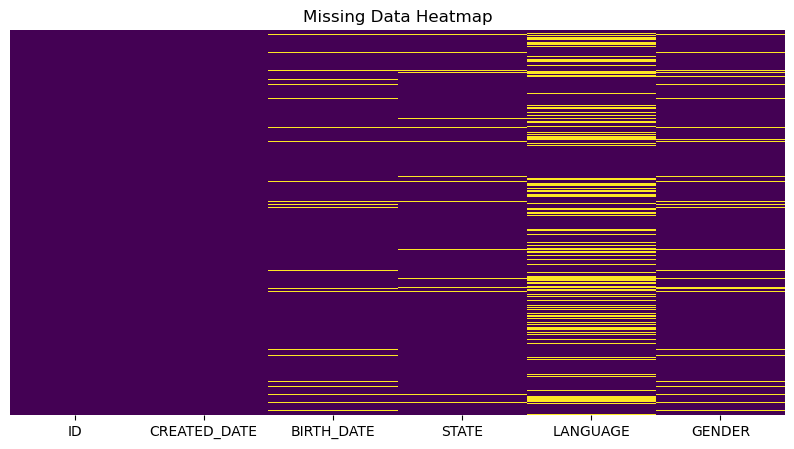

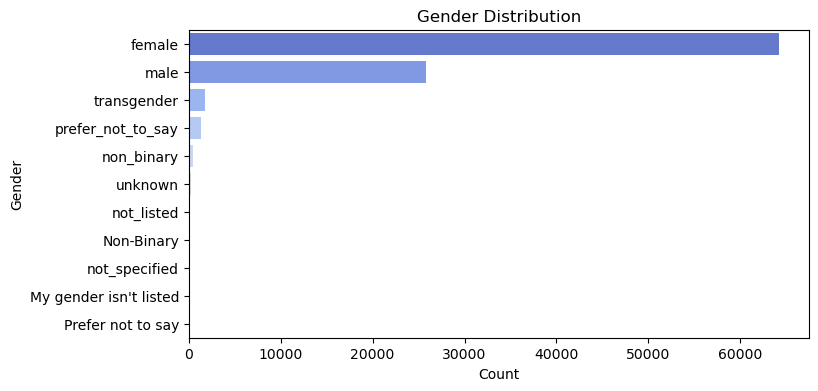

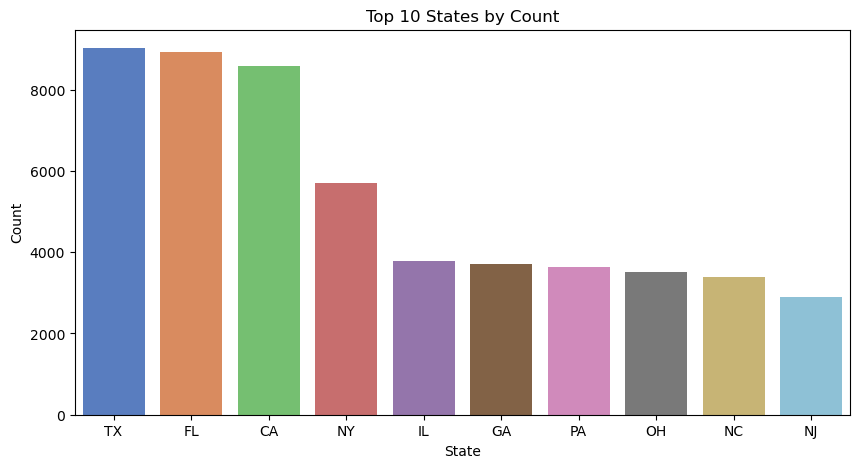

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "USER_TAKEHOME.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Convert date fields to datetime format
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], errors='coerce')
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce')

# 1. Missing values visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# 2. Countplot for gender distribution
plt.figure(figsize=(8, 4))
sns.countplot(y=df['GENDER'], order=df['GENDER'].value_counts().index, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

# 3. Countplot for state distribution (top 10 states)
plt.figure(figsize=(10, 5))
top_states = df['STATE'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="muted")
plt.title("Top 10 States by Count")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()


### 3. Challenging fields to Understand

1. STATES Values:

      The dataset contains a concentration of records from certain states.
      However, some entries are missing STATE values.
     
2. LANGUAGE:

     The column contains values like en, es-419, etc. While en is clearly English, es-419 represents Spanish (Latin America). Other language codes may not be immediately interpretable and might require a mapping to full language names


3. GENDER VALUES:

      While most values appear to be "male" or "female," missing or potentially non-standard values (e.g., other gender identities or typos) could cause inconsistencies.